In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib

##Preparing Data

In [ ]:
df = pd.read_excel('bank_subscription.xlsx')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.y = df.y.map({'no': 0, 'yes': 1})

In [ ]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
# Splitting the data into train, validation and test datasets
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
train.shape

(27126, 17)

In [ ]:
val.shape

(9042, 17)

In [ ]:
test.shape

(9043, 17)

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16849,55,management,married,tertiary,no,149,no,yes,telephone,25,jul,41,6,-1,0,unknown,0
38965,29,admin.,married,secondary,no,-211,yes,no,cellular,18,may,58,1,-1,0,unknown,0
19033,48,blue-collar,married,primary,no,0,no,yes,cellular,5,aug,67,1,-1,0,unknown,0
22962,33,technician,married,tertiary,no,-370,yes,no,cellular,26,aug,108,7,-1,0,unknown,0
39146,41,management,married,tertiary,no,1387,yes,no,cellular,18,may,154,2,-1,0,unknown,0


In [ ]:
Xtrain = train.iloc[:, :-1]
ytrain = train.y
Xval = val.iloc[:, :-1]
yval = val.y
Xtest = test.iloc[:, :-1]
ytest = test.y

In [ ]:
Xtrain.rename(columns= {'job_blue-collar': 'job_blue_collar', 'job_self-employed': 'job_self_employed'}, inplace=True)
Xval.rename(columns= {'job_blue-collar': 'job_blue_collar', 'job_self-employed': 'job_self_employed'}, inplace=True)
Xtest.rename(columns= {'job_blue-collar': 'job_blue_collar', 'job_self-employed': 'job_self_employed'}, inplace=True)

In [ ]:
Xtrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
16849,55,management,married,tertiary,no,149,no,yes,telephone,25,jul,41,6,-1,0,unknown
38965,29,admin.,married,secondary,no,-211,yes,no,cellular,18,may,58,1,-1,0,unknown
19033,48,blue-collar,married,primary,no,0,no,yes,cellular,5,aug,67,1,-1,0,unknown
22962,33,technician,married,tertiary,no,-370,yes,no,cellular,26,aug,108,7,-1,0,unknown
39146,41,management,married,tertiary,no,1387,yes,no,cellular,18,may,154,2,-1,0,unknown


In [ ]:
Xtrain.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
ytrain.head()

16849    0
38965    0
19033    0
22962    0
39146    0
Name: y, dtype: int64

In [ ]:
#Encoding the data
encoding_columns = list(df.iloc[:,:-1].select_dtypes(include=object))
encoding_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
education_status = {'unknown': 0,
       'primary': 1,
       'secondary': 2,
       'tertiary': 3}

# Encoding the education attribute
Xtrain['education'] = Xtrain['education'].replace(education_status)
Xval['education'] = Xval['education'].replace(education_status)
Xtest['education'] = Xtest['education'].replace(education_status)

In [ ]:
Xtrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
16849,55,management,married,3,no,149,no,yes,telephone,25,jul,41,6,-1,0,unknown
38965,29,admin.,married,2,no,-211,yes,no,cellular,18,may,58,1,-1,0,unknown
19033,48,blue-collar,married,1,no,0,no,yes,cellular,5,aug,67,1,-1,0,unknown
22962,33,technician,married,3,no,-370,yes,no,cellular,26,aug,108,7,-1,0,unknown
39146,41,management,married,3,no,1387,yes,no,cellular,18,may,154,2,-1,0,unknown


In [ ]:
# One Hot Encoding using Pandas
ohe_cols = list(df.iloc[:,:-1].select_dtypes(include=object))

# Performing One Hot on columns
Xtrain = pd.get_dummies(Xtrain ,columns = ohe_cols ,prefix=ohe_cols)
Xval = pd.get_dummies(Xval ,columns = ohe_cols ,prefix=ohe_cols)
Xtest = pd.get_dummies(Xtest ,columns = ohe_cols ,prefix=ohe_cols)

In [ ]:
Xtrain.rename(columns= {'job_admin.': 'job_admin','job_blue-collar': 'job_blue_collar', 'job_self-employed': 'job_self_employed'}, inplace=True)
Xval.rename(columns= {'job_admin.': 'job_admin','job_blue-collar': 'job_blue_collar', 'job_self-employed': 'job_self_employed'}, inplace=True)
Xtest.rename(columns= {'job_admin.': 'job_admin','job_blue-collar': 'job_blue_collar', 'job_self-employed': 'job_self_employed'}, inplace=True)

In [ ]:
Xtrain.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue_collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
16849,55,149,25,41,6,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38965,29,-211,18,58,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
19033,48,0,5,67,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
22962,33,-370,26,108,7,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39146,41,1387,18,154,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
ytrain.head()

16849    0
38965    0
19033    0
22962    0
39146    0
Name: y, dtype: int64

In [ ]:
Xval.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue_collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1503,31,948,8,91,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
16948,31,10122,25,63,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38610,48,1267,15,195,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3457,46,1114,15,490,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
10435,43,5658,12,462,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
Xtest.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue_collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4359,37,61,19,182,8,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
30109,45,412,4,45,5,265,13,0,1,0,...,0,0,0,0,0,0,1,0,0,0
25217,48,1208,18,126,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
43367,72,0,26,201,3,191,3,0,0,0,...,0,1,0,0,0,0,1,0,0,0
17313,43,150,28,290,7,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
yval.head()

1503     0
16948    0
38610    0
3457     0
10435    0
Name: y, dtype: int64

In [ ]:
ytest.head()

4359     0
30109    0
25217    0
43367    0
17313    0
Name: y, dtype: int64

##Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
random_forest.fit(Xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
val_prediction = random_forest.predict(Xval)
print(val_prediction[:5])
yval.iloc[:5]

[0 0 0 0 0]


1503     0
16948    0
38610    0
3457     0
10435    0
Name: y, dtype: int64

In [ ]:
accuracy = accuracy_score(yval, val_prediction)
print("Accuracy is: ", accuracy)

Accuracy is:  0.9063260340632603


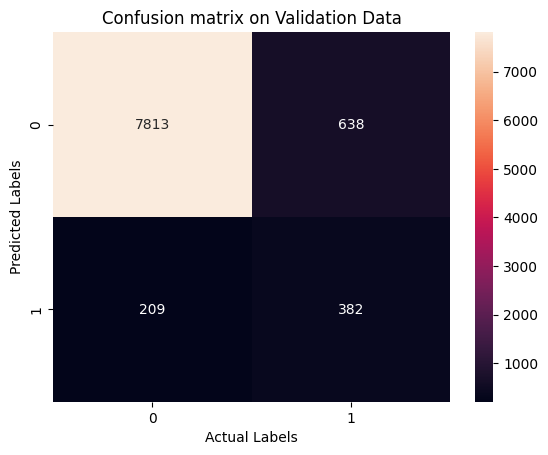

In [ ]:
plt.title("Confusion matrix on Validation Data")
sns.heatmap(confusion_matrix(val_prediction, yval), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [ ]:
print(classification_report(yval, val_prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8022
           1       0.65      0.37      0.47      1020

    accuracy                           0.91      9042
   macro avg       0.79      0.67      0.71      9042
weighted avg       0.89      0.91      0.90      9042



In [ ]:
test_prediction = random_forest.predict(Xtest)
print(test_prediction[:5])
ytest.iloc[:5]

[0 0 0 0 0]


4359     0
30109    0
25217    0
43367    0
17313    0
Name: y, dtype: int64

In [ ]:
accuracy = accuracy_score(ytest, test_prediction)
print("Accuracy is: ", accuracy)

Accuracy is:  0.9044564856795311


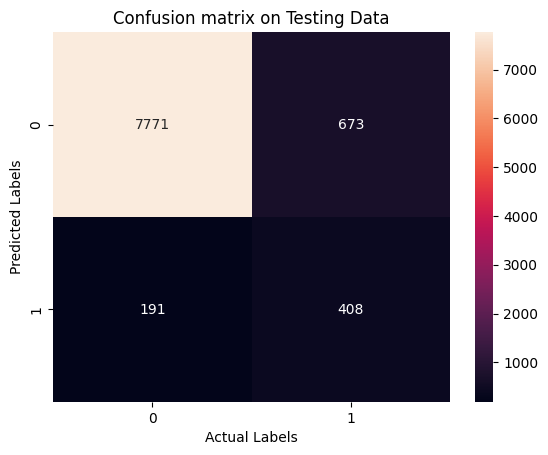

In [ ]:
plt.title("Confusion matrix on Testing Data")
sns.heatmap(confusion_matrix(test_prediction, ytest), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [ ]:
print(classification_report(ytest, test_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7962
           1       0.68      0.38      0.49      1081

    accuracy                           0.90      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, test_prediction).ravel() ##ravel flattens
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

True Positive Rate (TPR): 0.3774283071230342
False Positive Rate (FPR): 0.023988947500627984


In [ ]:
jaccard = jaccard_score(ytest, test_prediction)
jaccard

0.32075471698113206

In [ ]:
roc_auc = roc_auc_score(ytest, test_prediction)
roc_auc

0.6767196798112032

In [ ]:
precision = precision_score(ytest, test_prediction)
precision

0.6811352253756261

##Logistic Regression

In [ ]:
logistic_reg = LogisticRegression()

In [ ]:
logistic_reg.fit(Xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
val_prediction_lr = logistic_reg.predict(Xval)
print(val_prediction_lr[:5])
yval.iloc[:5]

[0 0 0 0 0]


1503     0
16948    0
38610    0
3457     0
10435    0
Name: y, dtype: int64

In [ ]:
accuracy_lr = accuracy_score(yval, val_prediction_lr)
print("Accuracy is: ", accuracy_lr)

Accuracy is:  0.8908427339084274


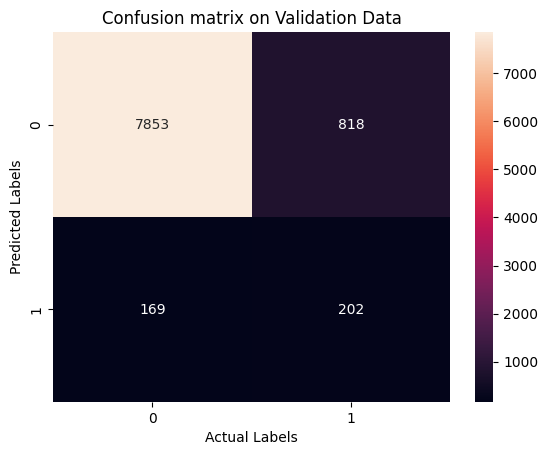

In [ ]:
plt.title("Confusion matrix on Validation Data")
sns.heatmap(confusion_matrix(val_prediction_lr, yval), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

##Support Vector Machine

In [ ]:
svc = SVC()

In [ ]:
svc.fit(Xtrain, ytrain)

SVC()

In [ ]:
val_prediction_svc = svc.predict(Xval)
print(val_prediction_svc[:5])
yval.iloc[:5]

[0 0 0 0 0]


1503     0
16948    0
38610    0
3457     0
10435    0
Name: y, dtype: int64

In [ ]:
accuracy_svc = accuracy_score(yval, val_prediction_svc)
print("Accuracy is: ", accuracy_svc)

Accuracy is:  0.887193098871931


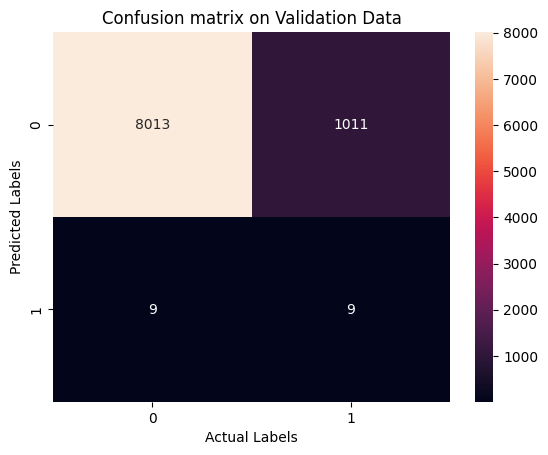

In [ ]:
plt.title("Confusion matrix on Validation Data")
sns.heatmap(confusion_matrix(val_prediction_svc, yval), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [ ]:
print('After analyzing and training three classification models: Logistic Regression, Random Forest Classifier and Support Vector Machine\nWe find Random Forest to be the best Classifier for our dataset')

After analyzing and training three classification models: Logistic Regression, Random Forest Classifier and Support Vector Machine
We find Random Forest to be the best Classifier for our dataset


In [ ]:
joblib.dump(random_forest, 'random_forest.joblib')

['random_forest.joblib']